# Машинное обучение, ВМК МГУ

# Практическое задание 2. Методы оптимизации в машинном обучении

## Общая информация
Дата выдачи: 14.03.2023

Мягкий дедлайн: 28.03.2023 23:59 MSK

Жёсткий дедлайн: 04.04.2023 23:59 MSK

## Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). **Максимальная оценка за работу  — 10 баллов + 9.2 бонусов.**

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-optimization-Username.ipynb

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 балла за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

### Часть 1. (1.5 балла) Негладкая оптимизация

В этом разделе мы рассмотрим задачу Lasso регрессии и сравним рассказанные на парах методы: субградиентный метод, ISTA и FISTA. Напомним, что задача выглядит следующим образом:

$$
\min_x \frac{1}{2}\|Ax - y \|^2_2 + \gamma \|x\|_1
$$

Для автоматического вычисления градиентов предлагается использовать jax, вы можете считать их руками или через torch, но мы считаем, что знать о существовании этой библиотеки полезно, тем более, что для выполнения задания достаточно знать информации с [этой страницы](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import cv2
import tqdm
import jax.numpy as jnp
from jax import grad, jit, vmap
import sklearn.preprocessing as skprep

In [ ]:
%config InlineBackend.figure_formats = ['svg']
sns.set_style('darkgrid')

Для сравнения методов сгенерируем данные:

In [ ]:
m = 500
n = 2500
np.random.seed(1)
A = np.random.rand(m, n) # матрица
A = skprep.normalize(A, norm="l2", axis=0)
U, S, Vh = np.linalg.svd(A, full_matrices=False)
S[-1] = min(S[-1], S[0] / 100000)
A = U @ (S[:, None] * Vh)
x_true = np.random.randn(n) # решение
x_true[np.random.rand(n) < 0.96] = 0
v = 9e-2 * np.random.randn(m)
y = A.dot(x_true) + v # таргет
gamma = 0.01 * np.linalg.norm(A.T.dot(y), ord=np.inf) # предлагаемый коэффициент регуляризации
x0 = np.random.rand(n) # начальное приближение

Давайте посмотри на степень разреженности решения

In [ ]:
print(f"Number of nonzeros in x_true is {np.sum(x_true != 0)} out of {x_true.shape[0]}")

**Задание 1. (0.15 баллов)** реализуйте оракул для Lasso регрессии с использованием jax, также реализуйте отдельно оракул для части с регрессией и для регуляризации, а также их градиентов. Для регуляризации добавьте метод prox, который вычисляет проксимальный оператор в заданной точке. 

*Замечание*. Вы можете менять интерфейсы классов так, как считаете нужным, предложенный вариант - один из возможных. Главное, чтобы все работало

In [ ]:
class LassoRegressionOracle:
    '''
    Class for whole Lasso regression oracle
    '''
    def __init__(self, A, y, gamma):
        ### YOUR AMAZING CODE HERE
        pass
    
    def __call__(self, x):
        ### YOUR AMAZING CODE HERE
        pass
        
    def grad(self, x):
        ### YOUR AMAZING CODE HERE
        ### Hint: use jax (probably you want use it in __call__ too)
        pass

In [ ]:
class BasicRegressionOracle:
    '''
    Class for regression part of lasso regression 
    '''
    def __init__(self, A, y):
        ### YOUR AMAZING CODE HERE
        pass
    
    def __call__(self, x):
        ### YOUR AMAZING CODE HERE
        pass
    
    def grad(self, x):
        ### YOUR AMAZING CODE HERE
        ### Hint: use jax (probably you want use it in __call__ too)
        pass

In [ ]:
class L1RegularizationOracle:
    '''
    Class for regularization part of lasso regression
    '''
    def __init__(self, gamma):
        ### YOUR AMAZING CODE HERE
        pass
    
    def __call__(self, x):
        ### YOUR AMAZING CODE HERE
        pass
    
    def prox(self, x, alpha):
        ### YOUR AMAZING CODE HERE
        pass

Выведите значения функционалов в точке x0:

In [ ]:
full_oracle = ### YOUR AMAZING CODE HERE
regression_oracle = ### YOUR AMAZING CODE HERE
regularization_oracle = ### YOUR AMAZING CODE HERE

assert np.allclose(full_oracle(x0), 581375.6875)
assert np.allclose(regression_oracle(x0), 581222.1875)
assert np.allclose(regularization_oracle(x0), 153.4744415283203)

**Задание 2 (0.65 баллов)**. Реализуйте субградиентный метод, ISTA и FISTA.

1) Для субградиентного метода возьмите шаг $\alpha_k=\frac{1}{\sqrt{k + 1} \|g_k\|_2}$, где $g_k$ - текущий субградиент. Он является одним из самых популярных выборов для рассматриваемого метода. Обратите внимание, что для субградиентного метода результатом является не последняя точка, а точка, в которой наблюдалось минимальное значение функционала

2) Для ISTA/FISTA выберете константный шаг

3) Параметр, отвечающий за ускорение, возьмите равным $\frac{k}{k+3}$

*Замечание*. Вы можете менять интерфейсы функций так, как считаете нужным, предложенный вариант - один из возможных. Главное, чтобы все работало

In [ ]:
def subgradient_method(oracle, max_iters, x0):
    """
    Функция, реализующая субградиентный метод
    :oracle - оракул
    :max_iters - максимальное количество итераций
    :x0 - начальная точка
    
    Функция возвращает историю (наименьшее значение функции по итерациям) и итоговую точку
    """
    return history, x_result

In [ ]:
def ISTA(full_oracle, regression_oracle, regularization_oracle, max_iters, x0, step_size):
    """
    Функция, реализующая проксимальный градиентный метод, в данном случае это будет ISTA
    :full_oracle - полный оракул
    :regression_oracle - оракул, содержащий регрессионную часть
    :regularization_oracle - оракул, содержащий регуляризационную
    :max_iters - максимальное количество итераций
    :x0 - начальная точка
    :step_size - размер шага
    
    Функция возвращает историю (значение функции в полученных в процессе итераций точках) и итоговую точку
    """
    return history, x_k

In [ ]:
def FISTA(full_oracle, regression_oracle, regularization_oracle, max_iters, x0, step_size):
    """
    Функция, реализующая ускоренный проксимальный градиентный метод, в данном случае это будет FISTA
    :full_oracle - полный оракул
    :regression_oracle - оракул, содержащий регрессионную часть
    :regularization_oracle - оракул, содержащий регуляризационную
    :max_iters - максимальное количество итераций
    :x0 - начальная точка
    :step_size - размер шага
    
    Функция возвращает историю (значение функции в полученных в процессе итераций точках) и итоговую точку
    """
    return history, x_k

**Задание 3. (0.3 баллов)** Посмотрите на скорость сходимости (используйте логарифмическую шкалу) ISTA и FISTA при разных размерах шага. Выберите лучший, сделайте выводы. Рассмотрите не менее 5 размеров шагов в диапозоне $10^{-6}...10^{-3.5}$

Возможно, это будет не лучший выбор шага, поэтому можете посмотреть и другие диапозоны

In [ ]:
### YOUR CODE HERE

**Выводы:**

**Задание 4. (0.4 баллов)** Сравните три метода оптимизации по скорости сходимости, а также по степени разреженности решения (считайте, что число равно нулю, если оно по модулю не превосходит $10^{-2}$. Сделайте выводы

In [ ]:
### YOUR CODE HERE

**Выводы:**

**Бонус 1. (1 балл)** Есть множество стратегий выбора шага для субградиентного метода, попробуйте следующий вариант

* General gradient norm: $\alpha_k=\frac{\alpha_0}{k^{\beta}\|g_k\|}$, $0 \leq \beta \leq 1$. Посмотрите не менее пяти значений параметра $\beta$ и пяти значений параметра $\alpha_0$

Сравните такие стратегии, если какая-то из них оказалась лучше предыдущей, то сравните метод с ISTA/FISTA. Сделайте выводы

In [ ]:
### YOUR CODE HERE

**Выводы:**

**Бонус 2. (1.5 баллов)** Часто жизнь оказывается такова, что мы не можем подобрать оптимальный константный шаг, потому что это может быть дорого или же мы просто можем не находить его, а константну гладкости функции мы можем и не знать (да, оптимальный размер шага зависит от нее). В этом случае можно искать шаг $\alpha_{k}$ при помощи backtracking search:

$$f(x_{k+1})\leq f(x_k) + \langle \nabla f_k, x_{k+1}-x_k \rangle + \frac{1}{2\alpha_k}\|x_k-x_{k+1}\|^2$$

А в качестве процедуры поиска использовать бинарный поиск

*Замечание.* Внимательный студет может заметить, что в этом случае мы пытаемся подобрать $\alpha_{k}$ так, чтобы оно было похоже на $\frac{1}{L}$, который и является оптимальным размером шага.

Попробуйте реализовать данную стратегию, сравните ее с уже реализованными методами. Дополнительно посчитайте, сколько раз вы вычисляли саму функцию. Сделайте выводы.

In [ ]:
### YOUR CODE HERE

**Выводы:**

### Часть 2 (1.5 балла). ADMM for matrix completion

Рассмотрим задачу восстановления матрицы $Y$. Мы наблюдаем только небольшой набор элементов матрицы $Y$, множество индексов известных элементов обозначим через $E$. То есть мы знаем $Y_{ij}$ для всех $(i,j) \in E$, и не знаем $Y_{ij}$ для всех $(i,j) \notin E$.

Понятно, что без наличия какой-либо дополнительной информации о матрице $Y$ эта постановка является тривиальной: любая матрица $X$, для которой выполнено $X_{i,j} = Y_{i,j}, \quad (i,j) \in E$ является разумным ответом. Таких матриц бесконечно много. Соответственно задача восстановления матриц обычно рассматривается как частный случай задачи приближения матрицы, а критерий качества (целевая функция) говорит не столько о близости $X$ к $Y$, сколько о полезных свойствах матрицы $X$ (этими свойствами матрица $Y$ может и не обладать).

Одна из самых популярных постановок является задача о поиске наилучшего приближения заданной матрицы матрицей малого ранга:

$$
\begin{align*}
& \min_{X} rank(X) \\
& X_{i,j} = Y_{i,j}, \quad (i,j) \in E\\
\end{align*}
$$

В общем случае эта задача является NP-трудной. Для того, чтобы обойти это припятствие ранк матрицы аппроксимируется той или иной выпуклой функцией от матрицы $X$. Стандартным выбором является переход к постановке задачи с использованием ядерной нормы

$$
\begin{align*}
& \min_{X}\|X \|_* \\
& X_{i,j} = Y_{i,j}, \quad (i,j) \in E\\
\end{align*}
$$

**Задание 1. (0.5 балла)** Сведите полученную задачу к виду, пригодному для решению с помощью ADMM. Запишите итерации, получите аналитические выражения для каждого шага.

**Решение:**

**Задание 2.(0.5 балла)** Реализуйте полученные формулы.

*Замечание*. Вы все еще в праве менять интерфейсы функций так, как хотите

In [ ]:
def MC_update_X(Z, lambda_, r):
    """
    Функция, обновляющая значение X для задачи Matrix Completion, используя переменные Z, lambda_ и r
    """
    ### YOUR CODE HERE
    pass


def MC_update_Z(X, lambda_, r, Y, mask):
    """
    Функция, обновляющая значение X для задачи Matrix Completion, используя переменные Z, lambda_, r, Y и маску E
    """
    ### YOUR CODE HERE
    pass
    

def MC_ADMM(Y, mask, tol, max_iters, r, Y_true):
    """
    Функция, решающая задачу Matrix Completion для известных пикселей Y в точках mask
    Считаем, что метод сходится, если ядерная норма поменялась за итерацию менее чем на tol
    Максимальное количество итераций - max_iters
    Параметр r для ADMM задается в интерфейсе
    Для вычисления различных метрик вам может потребоваться знание исходного изображения
    """
    ### YOUR CODE HERE
    pass

**Задание 3. (0 баллов)** Выберите любимую картинку, на которой вы будете тестировать алгоритм, покажите ее

In [ ]:
Y_true = cv2.imread('image.jpg')
Y_true = cv2.cvtColor(Y_true, cv2.COLOR_BGR2RGB) / 255
plt.grid(False)
plt.axis(False)
plt.imshow(Y_true)
plt.show()

**Задание 4.(0.3 балла)** Покажите сходимость алгоритма, а также, что он действительно решает задачу восстановления изображения при отсутствии 50 процентов пикселей

*Замечание*. Вы можете работать с изображением как с черно белым, но интереснее будет запускать ADMM на каждом из каналов :)

In [ ]:
def generate_mask(shape, size, seed=42):
    """
    Генерирует маску для изображения формы shape, оставляющую только size пикселей
    """
    np.random.seed(seed)
    mask = np.full(np.prod(shape), False)
    mask[:size] = True
    np.random.shuffle(mask)
    mask = mask.astype(bool)
    return mask.reshape(shape)

In [ ]:
### YOUR CODE HERE

**Задание 5.(0.2 балла)** Посмотрите на то, как влияет количество удаленных пикселей на качество восстановления, как с точки зрения нормы разности истинного изображения и восстановленного, так и с визуальной точки зрения. Посмотрите удаление 30, 50 и 80 процентов пикселей (приветствуется смотреть и другие значения, например, 90)

*Замечание*. Вы можете работать с изображением как с черно белым, но интереснее будет запускать ADMM на каждом из каналов :)

In [ ]:
def plot_results(X, Y_true, mask, alphas, figsize=(10, 30)):
    """
    Функция, отрисовывающая получившиеся результаты
    X - list восстановленных изображений (цветных)
    Y_true - настоящее изображение
    mask - list масок
    alphas - list состоящий из долей удаленных пикселей
    Функция написана в предположении, что Вы работаете с цветными изображениями, если вы выбрали работать с чб, то
    не забудьте поменять код
    """
    fig, ax = plt.subplots(nrows=len(X), ncols=3, figsize=figsize)
    for j in range(len(X)):
        tmp = np.copy(Y_true)
        current_mask = np.stack((~mask[j], ~mask[j], ~mask[j]), axis=2)
        tmp[current_mask] = 0
        content = [Y_true, tmp, X[j]]
        titles = ["Оригинальное изображение",
          f"Изображение с удаленными\n {int(alphas[j] * 100)}% пикселями",
          "Восстановленное изображение"]
        for i in range(3):
            ax[j][i].set_title(titles[i])
            ax[j][i].imshow(content[i])
            ax[j][i].grid(False)
            ax[j][i].axis(False)
    plt.show()

In [ ]:
### YOUR CODE HERE

### Часть 3. (2.95 баллов) Редукция дисперсии

Часто при обучении нейронных сетей возникает вопрос выбора параметра `batch_size`, как вы знаете батчирование (разбирали на паре) помогает уменьшить дисперсию стохастического градиента и следовательно улучшает сходимость. К сожалению, на практике мы не можем взять `batch_size` достаточно большим из-за ограничений видеопамяти, а стохастический градиент все еще достаточно шумный.

В этой части Вам предлагется реализовать метод **SVRG** и продемонстрировать его работу.

*Замечание*: в базовой реализации мы будем предполагать, что раз в $N$ итераций мы сможем сделать `backward pass` с большим батчом. На практике такое предположение не выполняется. Исправление данной проблемы является чисто технической задачей, которую не обязательно решать в учебных целях.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import os
import random
import copy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from torchvision.datasets import MNIST
import torchvision.transforms as transforms

In [ ]:
def set_global_seed(seed: int) -> None:
    """
    Set global seed for reproducibility.
    """
    

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)

set_global_seed(42)

**Задание 1. (0.1 баллов)** Предварительные сведения


При реализации **SVRG** вам потребуется сохранять веса и градиенты модели. В этом задании вам предлагается поменять местами (свапнуть) веса двух моделей с целью упражнения и упрощения поменимания дальнейшего кода.

*Подсказка 1*: обратите внимание на функцию `copy.deepcopy`

*Замечание*: Вы можете использовать функции `set_weights`, `set_grad`, но также можно реализовать их сами

In [ ]:
@torch.no_grad() 
def set_weights(parameters, parameters_new):
    """
    Функция устанавливает веса parameters_new как веса для parameters
    """
    
    for p1, p2 in zip(parameters, parameters_new):
        p1.data = p2.data.detach().clone()

@torch.no_grad()
def set_grad(parameters, parameters_new):
    """
    Функция устанавливает градиенты parameters_new как градиенты для parameters
    """
    for p1, p2 in zip(parameters, parameters_new):
        if p2.grad is not None:
            p1.grad = p2.grad.detach().clone()

In [ ]:
# Нейросети, веса которых вам нужно поменять местами

net1 = nn.Sequential(nn.Linear(4, 4), nn.ReLU()) 
net2 = nn.Sequential(nn.Linear(4, 4), nn.ReLU())

net1_p = list(net1.parameters())
net2_p = list(net2.parameters())

print("Параметры net1\n", net1_p)
print("Параметры net2\n", net2_p)

Поменяйте местами веса моделей, код необходимо написать ниже

In [ ]:
# ВАШ КОД ЗДЕСЬ

In [ ]:
print("Параметры net1 после обмена \n", list(net1.parameters()))
print("Параметры net2 после обмена \n", list(net2.parameters()))

**Задание 2. (0.2 баллов)** Реализуйте `SGD`

В качестве базового класса будем использовать [torch.optim.Optimizer](https://pytorch.org/docs/stable/optim.html#base-class). Цель этого пункта познакомить вас с тем, как внутри оптимизатора лежат веса и градиенты модели. Вам же необходимо написать шаг стохастического градиентного спуска.

In [ ]:
class SGDBase(optim.Optimizer):
    
    def __init__(self, params, lr):
        
        # Определение Базового класса
        defaults = dict(lr=lr)
        super().__init__(params, defaults)

    def step(self):
        
        # Итерация по всем группам параметров
        for group in self.param_groups:
            
            # Итерация по всем параметрам
            for p in group['params']:
                
                # Проверка на то, обучаем ли параметр
                if p.grad is None:
                    continue
                    
                # Ваш код здесь

Проверим работоспособность на простой функции и сравним наш алгоритм, с реализацией `optim.SGD`

In [ ]:
def foo(x):
    return (x - 1.0) ** 2

def testing_optimizer(x_0, optimizer_class, num_steps=10):
    x = nn.Parameter(data=x_0.clone()) # x - обучаемый параметр
    optimizer = optimizer_class([x], lr=0.1)
    history = [x.item()]
    
    for _ in range(num_steps):
        optimizer.zero_grad()
        
        loss = foo(x)
        loss.backward()
        
        optimizer.step()
        history.append(x.item())
    
    
    return np.array(history)

In [ ]:
x_0 = torch.tensor(10.0)
history_pytorch = testing_optimizer(x_0, optimizer_class=optim.SGD)
history_pytorch

In [ ]:
history_base = testing_optimizer(x_0, optimizer_class=SGDBase)
history_base

In [ ]:
assert (history_base == history_pytorch).all()

**Задание 3. (0.3 баллов)** Обертка над шагом обучения

Для дальнейшего удобства использования, напишем небольшой класс-обертку. Такой ход позволит скрыть от цикла обучения все функции связанные с шагом обучения. Благодаря этому мы сможем добавить **SVRG** (который влияет на только на итерацию обучения) переопределив класс-обертку. Тем самым наша реализация **SVRG** будет спрятана в обертки и не будет влиять на код цикла обучения.

*Замечание*: Ниже в целях уменьшения кода, мы предполагаем что в оптимизаторе только одна группа параметров. То есть оптимизаторы вида:

```python

optim.Adam([
        {"params": net1.parameters(), "lr": lr1},
        {"params": net2.parameters(), "lr": lr2},
    ...
    ])

```

**НЕ** будут поддерживаться

In [ ]:
class WrapperBase:
    
    def __init__(self, optimizer, loss_fn):
        """
        optimizer - базовый оптимизатор
        loss_fn - функция по батчу вычисляющая loss и другие важные в ходе обучения значения.
        Функция возвращает словарь, в котором обязательно присутсвует ключ 'loss'.
        Значение функции потерь храняться по ключу 'loss'
        
        """
        
        self.optimizer = optimizer
        self.loss_fn = loss_fn
    
    def get_param_groups(self):
        """
        return
        Ссылку на параметры модели, т.е. изменение значения, меняет значение внутри модели
        
        Замечание: захардкожено [0]
        """
        return self.optimizer.param_groups[0]['params']
    
    def get_group(self):
        """
        return
        Возвращает группу параметров оптимизатора
        
        Замечание: захардкожено [0]
        """
        return self.optimizer.param_groups[0]
    
    def zero_grad(self):
        """
        Обнуляет все градиенты для параметров оптимизатора
        """
        
        # Ваш код здесь
        
    def step(self):
        """
        Производит шаг оптимизатора
        """
        
        # Ваш код здесь
        
    def step_fn(self, batch):
        self.zero_grad()
        
        # Ваш код здесь
        
        self.step()
        
        return loss

Тогда мы можем переписать `testing_optimizer` следующим образом

In [ ]:
def testing_optimizer_wrapper(x_0, optimizer_class, num_steps=10):
    x = nn.Parameter(data=x_0.clone()) # x - обучаемый параметр
    optimizer = optimizer_class([x], lr=0.1)
    optimizer_wrapper = WrapperBase(optimizer, lambda x: {'loss': foo(x)})
    
    history = [x.item()]
    
    for _ in range(num_steps):
        optimizer_wrapper.step_fn(x)
        history.append(x.item())
    
    
    return np.array(history)

In [ ]:
x_0 = torch.tensor(10.0, requires_grad=True)
history = testing_optimizer(x_0, optimizer_class=optim.SGD)
history_wrapper = testing_optimizer_wrapper(x_0, optimizer_class=optim.SGD)

In [ ]:
assert (history == history_wrapper).all()

**Задание 4. (0.75 баллов)** **SVRG**

Реализуем метод `SVRG` как обёртку над базовым классом оптимизатора (оптимизатор используем условно как удобный интерфейс)

Для начала напомним вид алгоритма из семинара:

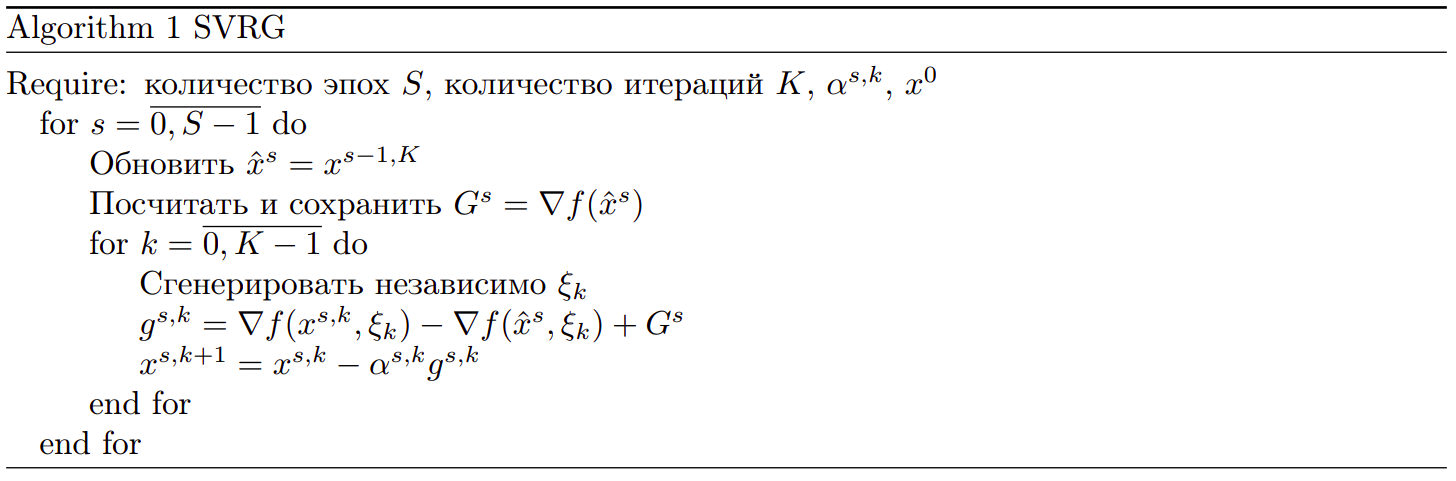

**ВАЖНО**

Мы будем реализовывать чуть другую версию:
    
```python

for i in range(1, N):
    if i % S == 0:
        w_large := w
        Обновить G_s           # градиент по всей выборки (большому батчу) при весах w_large
        
    Засэмплировать батч        # batch
    g_main                     # градиент по batch при весах w
    g_bias                     # градиент по batch при весах w_large
    g = g_main - g_bias + G_s
    
    w = w - lr * g
```

*Замечание*. Вы можете менять интерфейсы классов так, как считаете нужным, предложенный вариант - один из возможных. Главное, чтобы все работало

In [ ]:
class SVRG(WrapperBase):
    
    def __init__(self, optimizer, loss_fn, data, S):
        """
        data - вся выборка или батч большого размера, по которому считается градиент раз в S итераций
        S - параметр указывающий частоту пересчета градиента по всей выборки
        """
        
        super().__init__(optimizer=optimizer, loss_fn=loss_fn)
        
        self.data = data
        self.S = S
        self.counter = 0
    
    def step_fn(self, batch):
        
        # Обнуление градинетов модели, чтобы не накладывались при следующих вычислениях
        # Ваш код здесь
        
        # Подсчет градиента на батче
        # Ваш код здесь
        
        # Сохранение градиентов и весов посчитанных на батче
        # Ваш код здесь
        
        # Обнуление градинетов модели, чтобы не накладывались при следующих вычислениях
        # Ваш код здесь

        if self.counter == 0:
            # Подсчет градиента на большом множестве
            # Ваш код здесь
            
            
            # Сохранение градиентов и весов посчитанных на большом батче
            self.params_large = ...
            set_grad(self.params_large, self.get_param_groups())
            
            # Обнуление градинетов модели, чтобы не накладывались при следующих вычислениях
            # Ваш код здесь

        
        # Установка весов модели (для которой считали градиент на большом батче)
        # Ваш код здесь
        
        # Подсчет градиента на батче для поправки
        # Ваш код здесь
        
        
        # Сохранение градиентов посчитанных на батче поправки
        params_bias = ...
        set_grad(params_bias, self.get_param_groups())
        
        # Востановлние весов и градиентов прошлой модели
        # Ваш код здесь
        
        
        for p_main, p_large, p_bias in zip(self.get_param_groups(), self.params_large, params_bias):
    
            if p_main.grad is None:
                continue
    
            # Подсчет градиента с поправкаи
            d_p = ...
            
            # Подменяем градиенты для оптимизатора
            p_main.grad.data = d_p.detach().clone()
        
        # Шаг основного оптимизатора с новыми градиентами
        self.step()
        
        # Обновление счётчика
        self.counter += 1
        
        if self.counter == self.S:
            self.counter = 0
        
        return loss_main
        

**Задание 5: демонстрация использования оптимизатора (0 баллов)**: Эксперименты на  `MNIST`
    
Для корректных выводов по работе  **SVRG** нам необходиомо:

1) Задача на реальных данных

2) Baseline решения этой задачи


В качестве данных предлагается `MNIST`, в качестве Baseline следующий код.


Напомним, что **SVRG** придуман для понижения дисперсии стохастического градиента. Поэтому будем иметь 2 стандартных решения: с высокой и низкой дисперсией стохастического градиента. 


Вам необходимо обучить 2 и больше модели, с которыми Вы дальше будете сравниваться. Предполагается, что у одной модели будет выскоая дисперсия стохастического градиента, а у другой низкая. Другие модели тоже можно обучать для вывода (но эти 2 необходимо получить).


**Важно**: Все эксперименты должны быть воспроизводимы, поэтому фиксируете сид

**Важно**: Если будете менять обучение, постарайтесь, чтобы оно не заняло более 10 минут вычислений на гпу для 1 модели

*Замечание*: весь код ниже можно менять, главное выполнить задание 6 и показать 2 baseline, с которыми Вы дальше будете сравниваться



In [ ]:
device = "cpu"

if torch.cuda.is_available():
    device = "cuda:0"
    
device

Подготовка данных

In [ ]:
data_dir = "./data"
os.makedirs(data_dir, exist_ok=True)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5), std=(0.5))])

train_dataset = MNIST(root=data_dir, train=True, download=True, 
                      transform=transform)

test_dataset = MNIST(root=data_dir, train=False, download=True,
                     transform=transform)

Архитектура модели

In [ ]:
class MnistClassifier(nn.Module):
    
    def __init__(self, hidden_dim=10, image_dim=28):
        
        super().__init__()
        
        self.fc_input = nn.Sequential(nn.Flatten(), 
                                      nn.Linear(image_dim ** 2, hidden_dim), 
                                      nn.SiLU())
        
        self.fc_out = nn.Sequential(nn.Linear(hidden_dim, 10))
        
        
    def forward(self, x):
        
        return self.fc_out(self.fc_input(x))

Определение `loss_fn` для класса обертки

In [ ]:
def loss_fn_constructor(model, device):
    criterion = nn.CrossEntropyLoss(reduction='mean')
    
    def loss_fn(batch):
        X_batch, y_true = batch
        
        X_batch = X_batch.to(device)
        y_true = y_true.to(device)
            
        out = net(X_batch)
        loss = criterion(out, y_true)
        
        y_pred = torch.argmax(out, 1)
        accuracy = torch.sum(y_pred == y_true) / y_pred.shape[0]
        
        return {'loss': loss, 'accuracy': accuracy}
    
    return loss_fn

**Логирование**

Для проведение экспериментов вам потребуется отслеживать следующие показатели:

- Дисперсия стохастического градиента

- Значения loss и accuracy на train и test

- Дисперсия весов модели

Для логирования Вы можете использовать любые библиотеки либо собирать данные во время обучения и выводить их после. Здесь предложена реализация через wandb, но вы можете ее не использовать.

**ВАЖНО** 

1. Без графиков или иных подтверждающих результатов работа не будет засчитана

2. Все графики должны быть в ноутбуке, то есть нельзя прикреплять ссылки на запуск

3. Все запуски должны быть воспроизводимы при последовательном выполнении ячеек

In [ ]:
import wandb

In [ ]:
@torch.no_grad()
def log_variance(model, global_step):
    for tag, value in model.named_parameters():
        g = value.grad
        if g is None:
            continue
        
        wandb.log({f"grad_var/{tag}": torch.var(g.cpu())}, global_step)
        wandb.log({f"params_var/{tag}": torch.var(value.data.cpu())}, global_step)

**Обучение**

Так как **SVRG** обновляет большой градиент каждые $S$ итераций, то для частоты эксперимента будем обучать каждую модель фиксированное число итераций.

In [ ]:
@torch.no_grad()
def evaluate(net, valid_dataloader, criterion_fn, device):
    net.eval()
    loss, accuracy = 0, 0
    count = 0
    for X_batch, y_true in valid_dataloader:
        X_batch = X_batch.to(device)
        y_true = y_true.to(device)

        out = net(X_batch)
        y_pred = torch.argmax(out, 1)
        
        bs = out.shape[0]
        loss += criterion_fn(out, y_true).item() * bs
        accuracy += torch.sum(y_pred == y_true).item()
        count += bs
        
    return loss / count, accuracy / count

    

def train(iters_num, net, optimizer_wrapper, criterion_fn, train_dataloader, valid_dataloader, device, name):
    
    wandb.init(project="mmro_mmp", name=name)
    global_step = 1
    net = net.to(device)
    
    iters_per_epoch = len(train_dataloader)
    epoch_num = iters_num // iters_per_epoch + (iters_num % iters_per_epoch != 1)
    
    for epoch in tqdm(range(epoch_num)):        
        for batch in train_dataloader:
            
            d = optimizer_wrapper.step_fn(batch)
            loss = d['loss']
            accuracy = d['accuracy']
            
            log_variance(net, global_step)
            wandb.log({"train/loss": loss.item(), "train/accuracy": accuracy.item()}, step=global_step)
            
            if global_step % 50 == 0:
        
                loss, accuracy = evaluate(net, valid_dataloader, criterion_fn, device)
                net.train()
                
                wandb.log({"eval/loss": loss, "eval/accuracy": accuracy}, step=global_step)
            
            
            if global_step == iters_num:
                break
                
            global_step += 1
        
    wandb.finish()

Продемонстриуем как получить модель с низкой дисперсией стохастического градиента

*Замечание*: Параметры архитектуры и количесства итерецией желательно не менять (все необходимые результаты можно получить и не изменяя их) 

In [ ]:
set_global_seed(42)

net = MnistClassifier(hidden_dim=10)
loss_fn = loss_fn_constructor(model=net, device=device)

optimizer = optim.SGD(net.parameters(), lr=1e-2)
optimizer_wrapper = WrapperBase(optimizer=optimizer, loss_fn=loss_fn)

train_dataloader = DataLoader(train_dataset, batch_size=1024, shuffle=True, drop_last=True)
val_dataloader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

criterion_fn = nn.CrossEntropyLoss(reduction='mean')

In [ ]:
train(
    iters_num=1_000, 
    net=net,
    optimizer_wrapper=optimizer_wrapper,
    criterion_fn=criterion_fn,
    train_dataloader=train_dataloader,
    valid_dataloader=val_dataloader,
    device=device,
    name="SGD_bs_large")

При правильной реализации accuracy на тесте будет  `∼0.88`

**Задание 6. (0.5 баллов)**: получите модель с высокой дисперсией стохастического градиента



In [ ]:
# Ваш код здесь

При правильной реализации accuracy на тесте будет  ` > 0.74`

**Сделайте выводы**: как влияет дисперсия градиента на обучение (loss, accuracy)

Обязательно продемонстрируйте графики, подтверждающие Ваши выводы.


**Задание 7. (0.1 баллов)**: проверка **SVRG**

Выберите подмножество обучающего датасета, по которому будете считать "честный" градиент. Это может быть либо сам датасет, либо батч размера сильно больше чем батч обучающей выборки.

Убедитесь, что выбранный вами батч не смещен, т.е. присутсвуют все классы в равных пропорциях

In [ ]:
# ВАШ КОД ЗДЕСЬ

data = ...

Проверьте корректность вашей реализации **SVRG**, для этого предлагается провести следующий эксперимент:

Если выбрать `S = 1`, то ожидается что обучение станет похожим на градиентный спуск, т.е. траектории обучения похожи на запуск с большим `batch_size`.

Обратите, что функция `step_fn` возвращает значения функций на батче обучающей выборки, т.е. значения достаточно шумные

In [ ]:
set_global_seed(42)

net = MnistClassifier(10)
loss_fn = loss_fn_constructor(model=net, device=device)

optimizer = optim.SGD(net.parameters(), lr=1e-2)
optimizer_wrapper = SVRG(optimizer=optimizer, loss_fn=loss_fn, data=data, S=1)

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)
val_dataloader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

criterion_fn = nn.CrossEntropyLoss(reduction='mean')

При правильной реализации accuracy на тесте будет  `∼0.88`

Насколько согласована реально полученная картина с ожиданиями? Сделайте выводы.

**Выводы**:
    

**Задание 8. (1 балл)**: Эксперименты (если у вас 1 запуск занимает 1 минуту, то секция должна выполняться не более 16 минут)

Запуск будет считаться **корректным** если соблюдаются следующие правила:

1) Выберите подмножество обучающей выборки `data`, по которому будете считать честный градиент.

2) Так как цель метода, без особой вычислительной нагрузки уменьшить дисперсию, то выбирать размер `data` и `S` нужно брать разумными. Разумным считаются такие параметры, при которых количество подсчетов градиентов от элемента выборки во время обучения увеличиться не более чем в 3 раза.


Пример **НЕ** правильного подбора:

`batch_size = 2`

`len(data) = 50000`

`S = 1`


Каждая итерация обучения в среднем будет делать `50002` подсчетов градиента, вместо 2

Пример разумного подбора:

`batch_size = 2`

`len(data) = 256`

`S = 100`

Каждая итерация обучения в среднем будет делать `4.56` подсчетов градиента, вместо 2

**Важно**: правила можно нарушать для проверки и демонстрации граничных случаев, но базовые эксперименты все равно должны быть продемонстрированы

Цель эксперимента:

Продемонстровать как меняется обучение от размера `data` и параметра `S`.

Необходимы минимум перебора параметров:

$S = 100, 300, 500$

$len(data) = 256$ и любой на ваше усмотрение, который согласуется с правилами выше.


Минимальные показатели, по которым должны быть сделаны выводы:

1) Лучший показатели accuracy, loss на валидации

2) Поведение графиков на валидации и обучении

3) Дисперсия стохастического градиента

4) Время обучение модели

5) Максимальная занятая память (wandb логирует)

6) Среднее число подсчетов градиентов на одной итерации обучения (за 1 подсчет считается вызов от 1 элемента выборки) (Формула выше в примерах описана)


Без учета поведения дисперсии стохастического градиента задание не будет засчитано!


**Важно**: не обязательно делать комбинаторный перебор, обычно достаточно более разумного подбора параметров


**Важно**: Вы можете менять все функции если вам необхдимо, главное чтобы работало

**ОБЯЗАТЕЛЬНО НУЖНО ПРИКРЕПИТЬ ГРАФИКИ В НОУТБУК, НЕ ССЫЛКУ**


**ОЧЕНЬ ОЧЕНЬ ВАЖНО**: Все результаты должны сравниваться с обученными раннее моделями baseline. И делать выводы учитывая их. Нельзя исследовать метод в вакуме без хороших примеров для сравнения!

In [ ]:
# ВАШ КОД ЗДЕСЬ

**Бонус 1 (1 баллов)**: Уменьшить максимальное потребление видео памяти (обратить на внимание подсчета большого батча). Продемонстрировать как поменялось время обучение и потребление памяти.

**Бонус 2 (1.25 баллов)**: Проверить для других оптимизаторов влияние SVRG. При нашей реализации достаточно заменить базовый оптимизатор, на любой другой при создании обёртки. Сравнить сходимость метода и основные показатели

**Бонус 3 (1.25 баллов)**: Реализовать L-SVRG и сравнить результаты с SVRG и простым стохастическим градиентным спуском. Сравнить сходимость метода и основные показатели

**Бонус 4 (1.5 баллов)**: Реализовать метод [SAGA](https://www.di.ens.fr/~fbach/Defazio_NIPS2014.pdf) или любой другой метод понижения дисперсии (кроме батчирования). Описать идею метода. Сравнить сходимость метода и основные показатели

### Часть 4 (2.55 баллов). Методы Ньютона и LBFGS для пуассоновской регрессии.

В этой части задания вам предстоит обучить модель пуассоновской регрессии. Для этой задачи вы реализуете метод Ньютона и оракулы для Newton-CG и LBFGS.

###### Постановка задачи

Рассмотрим задачу количественной регресии (count regression). Пусть дана выборка $\{x_i,y_i\}_{i=1}^\ell$, где $x_i\in\mathbb{R}^d$, $y_i\in\mathbb{N}\cup\{0\}$.

Будем считать, что
$$
y\sim p(y\,|\,\lambda)={e^{-\lambda}\over y!}\lambda^{y},
$$
где $\lambda=\exp(w^Tx)$.

Как вы могли догадаться, мы имеем дело с обобщённой линейной моделью. Обучение производится методом максимизации правдоподобия:
$$
p(X\,|\,w)=\prod_{i=1}^\ell p(y_i\,|\,x_i,w)\to\max_w\iff \mathcal{L}(x,y,w)=-\log p(y\,|\,\exp(w^Tx)),\ Q=\sum_{i=1}^\ell\mathcal{L}(x_i,y_i,w)\to\min_w.
$$

Алгоритм предсказания пуассоновской регрессии:
$$
a(x)=\lfloor\exp(w^Tx)\rfloor.
$$

**Задание 1. (0.5 баллов)**. Выведите формулы градиента $\nabla_wQ$ и гессиана $\nabla^2_wQ$.

**Решение:**

**Задание 2 (0.8 баллов)**. Реализуйте полученные формулы в виде функции оракула.

In [ ]:
import numpy as np

class Oracle:
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def fun(self, weights):
        """Compute objective, gradient, hessian"""
        # your code is here
    
    def jac(self, weights):
        """Compute gradient. Use it for LBFGS, Newton-CG, Newton."""
        # your code is here
    
    def hess(self, weights):
        """Compute hessian. Use it for Newton."""
        # your code is here
    
    def hessp(self, weights, vector):
        """Compute `hessian-times-vector` product. Use it for Newton-CG"""
        # your code is here

In [ ]:
# Вспомогатейльный класс, который будет логгировать процесс обучения
from time import perf_counter


class Logger:
    def __init__(self):
        self.w = []
        self.time = []
    
    def __call__(self, weights):
        self.w.append(weights)
        
        if hasattr(self, 'prev'):
            self.time.append(perf_counter() - self.prev)

        self.prev = perf_counter()

**Задание 3. (0 баллов)**. Протестируем алгоритм на синтетических данных

In [ ]:
def cartesian_product(*arrays):
    """https://stackoverflow.com/a/11146645"""
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

Датасет будет состоять из точек, взятых по сетке на прямоугольнике [0,3] x [0,3] 

In [ ]:
n_points_root = 50

x = np.linspace(0, 3, n_points_root)
y = np.linspace(0, 3, n_points_root)

features = cartesian_product(x, y)
features.shape

Зафиксируем золотое значение параметров:

In [ ]:
w = np.array([0.7, -0.25])

Метки сгенерируем из пуассоновского распределения:

In [ ]:
targets = np.random.poisson(np.exp(features @ w))
targets.shape

Визуализируем выборку:

In [ ]:
import matplotlib.pyplot as plt

def visualise(z):
    ax = plt.contourf(x, y, z.reshape(n_points_root, n_points_root).T)
    cbar = plt.colorbar(ax)
    cbar.ax.set_ylabel('target')
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.show()

visualise(targets)

Следующая ячейка должна выполняться без ошибок **(иначе -0.4 балла)**

In [ ]:
from scipy.optimize import minimize

oracle = Oracle(features, targets)
cb = Logger()
weights = np.random.normal(size=2)
res = minimize(
    oracle.fun, weights,
    method="L-BFGS-B",
    jac=oracle.jac,
    callback=cb
)
res

Результат `res` должен содержать информацию об успешной оптимизации, а полученные веса должны быть похожи на те, что заданы выше:

In [ ]:
res['x']

Визуализируйте предсказания:

In [ ]:
pred = np.floor(np.exp(features @ res['x']))

visualise(pred)

Следующая ячейка должна выполняться без ошибок и сообщать об успешной оптимизации **(иначе -0.4 балла)**:

In [ ]:
oracle = Oracle(features, targets)
cb = Logger()
weights = np.random.normal(size=2)
res = minimize(
    oracle.fun, weights,
    method="Newton-CG",
    jac=oracle.jac,
    hessp=oracle.hessp,
    callback=cb,
)
res

In [ ]:
res['x']

**Задание 4 (0.25 баллов)**. Реализуйте бектрекинг по правилу Армихо.

In [ ]:
def line_search(f, grad, x, d, c=1e-4, rho=0.9, tol=1e-3, alpha0=1):
    """
    Line search for learning rate with Armijo condition.

    Params
    ------
    f: objective function
    grad: vector
    x: current solution of optimization problem
    d: direction along which to search
    alpha0: initialization for alpha
    
    Return
    ------
    alpha: lr for newton step
    """
    # your code is here

**Задание 5. (0.25 баллов)**. Реализуйте демпфированный метод Ньютона. В качестве критерия останова используйте норму градиента (гиперпараметр `tol`).

*Замечание.* callback вызывать в конце каждой итерации.

In [ ]:
from scipy.optimize import OptimizeResult


def Newton(fun, x0, *args, **kwargs) -> OptimizeResult:
    # helper functions
    callback = kwargs['callback']
    jac = kwargs['jac']
    hess = kwargs['hess']

    # hyper params
    max_iter = kwargs['max_iter']
    tol = kwargs['tol']
    alpha0 = kwargs['alpha0']

    x = x0
    for t in range(1, max_iter+1):
        # your code is here
    
    return OptimizeResult(
        fun = loss,                 # resulting loss value
        x = x,                      # optimal weights
        n_it = t,                   # number of iterations used
        success = (t != max_iter)   # flag of success
    )

Следующая ячейка должна выполняться без ошибок и сообщать об успешной оптимизации

In [ ]:
oracle = Oracle(features, targets)
cb = Logger()
weights = np.random.normal(size=2)
res = minimize(
    oracle.fun, weights,
    method=Newton,
    jac=oracle.jac,
    hess=oracle.hess,
    callback=cb,
    options=dict(
        tol=0.1,
        max_iter=10,
        alpha0=1
    )
)
res

**Задание 6 (0.75 баллов)**. Применим методы к реальным данным

Применим наши три алгоритма к реальным данным. Источник данных: https://www.kaggle.com/datasets/pablomonleon/montreal-bike-lanes. 

Описание к датасету:
> Is there a relationship between the number of bicyclists who use different bike paths on the same day? Can you predict how many riders there will be on one path given how many are on another?

In [ ]:
import pandas as pd

df = pd.read_csv('dataset.csv')

target = df['target']
features = df.drop(columns=['target'])
print(features.shape, target.shape)
features.head()

Следующая ячейка кодирует временные признаки и нормирует все остальные:

In [ ]:
# cycle encode time features
data = features[['month', 'day']].copy()
data['month_sin'] = np.sin(2 * np.pi * data['month']/31)
data['month_cos'] = np.cos(2 * np.pi * data['month']/31)

data['day_sin'] = np.sin(2 * np.pi * data['day']/12)
data['day_cos'] = np.cos(2 * np.pi * data['day']/12)

# normalize other features
data2 = features.drop(columns=['month', 'day'])
data2 = (data2 - data2.mean()) / data2.std()

# add constant feature
n_samples = df.shape[0]
features = pd.concat([data2, data[['month_sin', 'month_cos', 'day_sin', 'day_cos']]], axis=1)
features['constant'] = np.ones(n_samples)
features.head()

In [ ]:
X = features.to_numpy()
y = target.to_numpy()

X.shape, y.shape

Разделите выборку случайно на трейн и тест в отношении 9:1, зафиксируйте `seed=0`. Обучите следующие алгоритмы и измерьте качество на отложенной выборке:

- LBFGS
- Newton-CG
- Newton
- `sklearn.linear_model.PoissonRegressor`

**Замечание.** Если для метода Ньютона раз в несколько запусков появляется ошибка `singular matrix`, то ничего страшного (наверное). Если метод часто расходится, то попробуйте поварьировать параметр `alpha0` или другие параметры бектрекинга.

**Подсказка.** Меряйте качество на отложенной выборке так: `np.mean((np.log(pred + 1) - np.log(y + 1)) ** 2)`.

**(!)** Для каждого алгоритма постройте scatterplot для пар (true, pred) на трейне и на тесте, который покажет, как плохи/хороши полученные предсказания.

**(!)** Сделайте выводы о полученных результатах. Насколько они согласуются с вашими ожиданиями?

In [ ]:
### YOUR ADVENTURE STARTS HEREz

### Часть 5. (1.5 баллов) CVXPY

Для анализа изображений часто используется метод неотрицательной матричной факторизации ([Nonnegative matrix factorization](https://arxiv.org/pdf/1401.5226.pdf)). 
Идея в том, чтобы решить следующую задачу

\begin{align*}
& \min_{W, H} \frac12 \|X - WH\|^2_F \\
\text{s.t. } & W \geq 0\\
& H \geq 0,
\end{align*}

где знак $\geq$ означает покомпонентное сравнение. 
Также матрицы $W$ и $H$ малого ранга, то есть $W \in \mathbb{R}^{m \times k}$ и $H \in \mathbb{R}^{k \times n}$, где $k$ - параметр, который необходимо настраивать.
Чем больше $k$, тем точнее приближение, но и тем дольше будет решаться задача.
Матрица $X \in \mathbb{R}^{m \times n}$, где $m$ - это число фото в нашем наборе, а $n$ - это количество пикселей в каждой картинке, то есть каждая строка матрицы $X$ - это векторизованная картинка.

**Задание 0. (0.15 баллов)** Как можно интерпретировать факторы $W$ и $H$ и почему важна их покомпонентная неотрицательность?

**Ответ:**

Такую задачу можно решать с помощью cvxpy, если воспользоваться идеей попеременной оптимизации (alternating optimization). Идея состоит в том, чтобы на чётных итерациях решить точно задачу относительно параметра $W$ при фиксированном параметре $H$, а на нечётных наоборот: использовать решение для $W$ с предыдущей итерации в качестве фиксированного параметра и найти решение задачи относительно $H$ и так далее до сходимости.
Сначала Вам нужно инициализировать матрицы $W$ и $H$ какими-нибудь матрицами с неотрицательными элементами.

Загрузим данные. Мы будем раскладывать изображения лиц. О таком подходе к анализу фотографий лиц вам рассказывали или расскажут в курсе ОиРИ, а тут вы просто реализуете этот метод

In [ ]:
import cvxpy as cvx
import sklearn.datasets as skldata
import matplotlib.pyplot as plt
import sklearn.decomposition as skdec
%matplotlib inline
data = skldata.fetch_olivetti_faces()
import numpy as np
print("Shape of data = {}".format(data["images"].shape))
index = 42
plt.imshow(data["images"][index], cmap=plt.cm.Greys)
plt.colorbar()
_ = plt.axis("off")

**Задание 1. (1.05 балл)** Реализуйте с помощью cvxpy идею попеременной оптимизации для этой задачи и решите её

*Совет от Соника:* Сперва тестируйте алгоритм не на всех данных, так как вычисления занимают большое количество времени

*Замечание*: все еще можно менять интерфейсы функций

In [ ]:
def non_negative_matrix_factorization(X, rank, max_iters, tol, log=False):
    """
    X - матрица изображений. Каждое изображение является строкой
    rank - какой будете использовать ранг
    max_iters - максимальное количество итераций
    tol - точность, с какой решается задача
    log - флаг, отвечающий за то, будете ли вы печатать логи или нет (такое желание может возникнуть, так как
    алгоритм будет работать долго)
    Функция возвращает найденные матрицы H и W, а также значения функционала в ходе оптимизации
    """
    ### YOUR CODE HERE
    return H, W, objective_values

In [ ]:
### YOUR CODE HERE

**Задание 2. (0.1 балл)** Нарисуйте график сходимости по функции и убедитесь, что метод сошёлся или же изменение целевой функции пренебрежимо мало

In [ ]:
### YOUR CODE HERE

**Задание 3. (0.1 баллов)** Поскольку размерность $H$ - $k \times n$, то каждую строку $H$ можно преобразовать в картинку аналогично тому, как были собраны строки матрицы $X$. Нарисуйте 10 картинок полученных из строк матрицы $H$. Что Вы заметили и как это соотносится с ответами на вопрос задания 0?

*Hint:* Используйте ```plt.colorbar()``` и цветовую схему ```plt.cm.Greys``` для более чёткого отображения значений пикселей

In [ ]:
### YOUR CODE HERE

**Задание 4. (0.1 баллов)** Нарисуйте матрицу $W$ с помощью функции `plt.imshow` (или `plt.spy`). Насколько сильно она заполнена и почему?

In [ ]:
### YOUR CODE HERE

### Бонус

**Задание. (0.7 баллов)** Пробудите в себе внутреннего мемодела и придумайте мемный шедевр на тему ваших взаимоотношений с методами оптимизации.

**Ваш мем:**